# Memory analysis plots

In [1]:
import pandas as pd
res = pd.read_csv("mem_test/mem_graphs/res.csv")
tarjan = res[res.algo=="tarjan"].drop(columns=["algo"])
nuutila = res[res.algo=="nuutila"].drop(columns=["algo"])
pearce = res[res.algo=="pearce"].drop(columns=["algo"])
pearce_nr = res[res.algo=="pearce_nr"].drop(columns=["algo"])

In [16]:
r = tarjan.merge(nuutila, on=["v","e"]).merge(pearce, on=["v","e"]).rename(columns={"mem_x":"tarjan","mem_y": "nuutila", "mem":"pearce"}).sort_values(by=["e"]).merge(pearce_nr, on=["v","e"]).rename(columns={"mem":"pearce_nr"})
r

,v,e,tarjan,nuutila,pearce,pearce_nr
0,250,110,93101,90685,89605,91013
1,750,400,124991,118703,115559,116839
2,500,409,113224,108776,106664,108104
3,250,431,104342,99462,98870,99910
4,500,790,131869,123053,120397,119485
5,1000,970,151961,143449,139273,140777
6,1000,999,267054,203006,193470,147950
7,750,1000,143855,134239,130983,132063
8,250,1985,171416,157992,155776,149680
9,750,1999,204278,179926,174382,163614


/usr/lib64/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


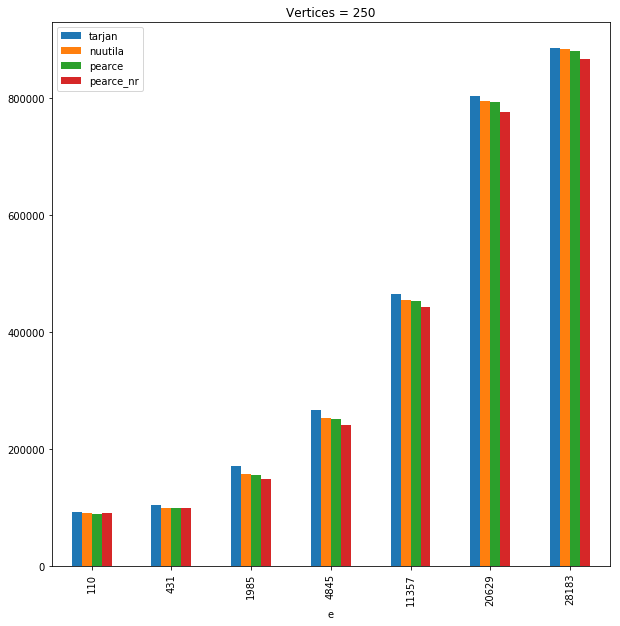

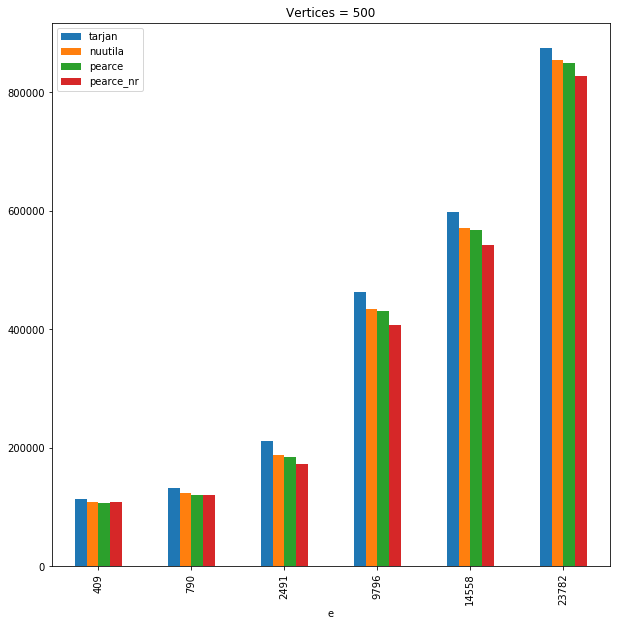

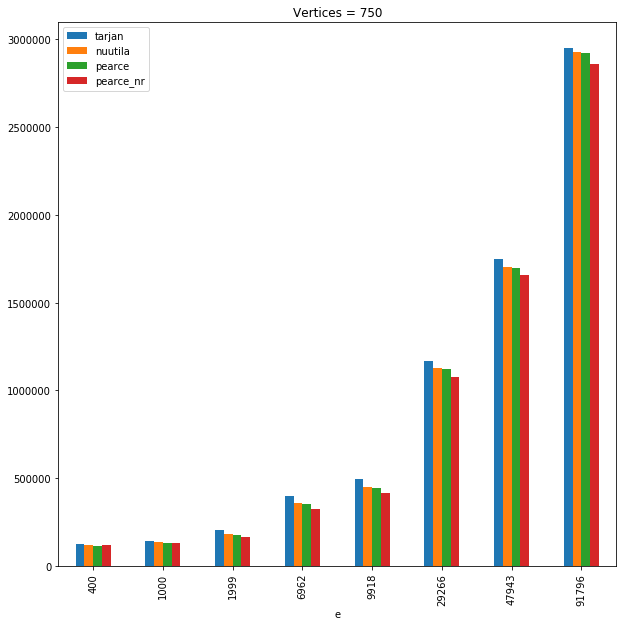

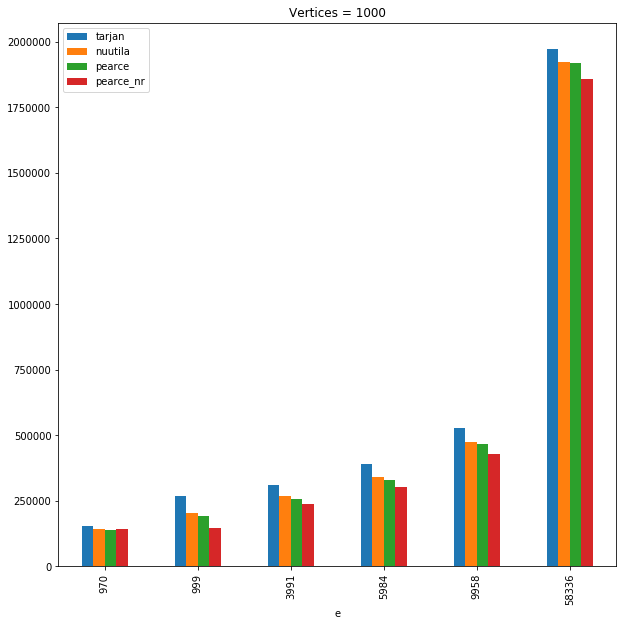

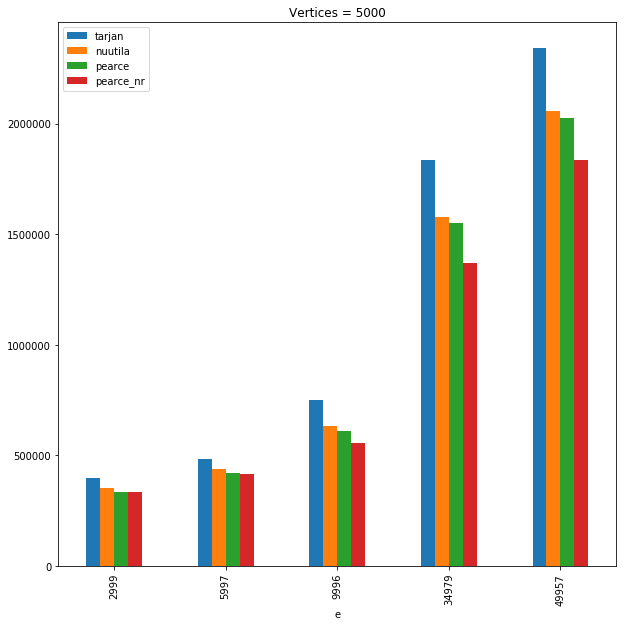

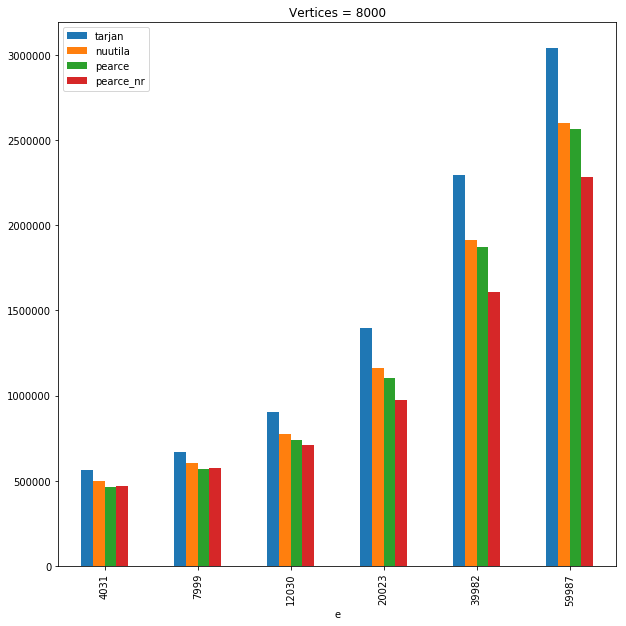

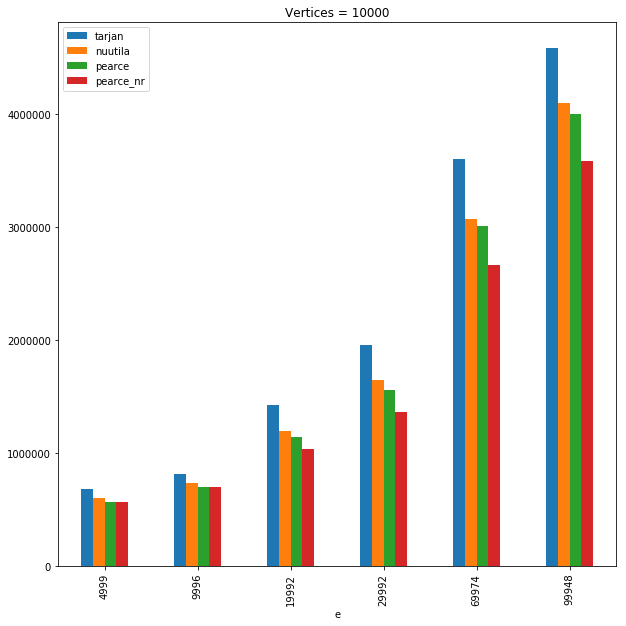

In [15]:
for v in sorted(list(set(r.v.values.tolist()))):
    r[r.v==v].plot(x="e", y=["tarjan", "nuutila", "pearce", "pearce_nr"], figsize=[10,10], kind="bar", title = f'Vertices = {v}')

In [20]:
quasi_c=pd.read_csv("mem_test/single_component/res.csv").drop(columns=["e"])
catena=pd.read_csv("mem_test/chain_DAG/res.csv").drop(columns=["e"])
quasi_c["graph"]="Single component"
catena["graph"]="Chain DAG"

In [21]:
quasi_c

,algo,v,mem,graph
0,nuutila,100000,8306079,Single component
1,nuutila,10000,897039,Single component
2,nuutila,1000,153575,Single component
3,pearce,100000,7893575,Single component
4,pearce,10000,855783,Single component
5,pearce,1000,149447,Single component
6,tarjan,100000,9118583,Single component
7,tarjan,10000,978295,Single component
8,tarjan,1000,161703,Single component


In [22]:
catena

,algo,v,mem,graph
0,nuutila,100000,5786942,Chain DAG
1,nuutila,10000,645694,Chain DAG
2,nuutila,1000,131566,Chain DAG
3,pearce,100000,5374438,Chain DAG
4,pearce,10000,604438,Chain DAG
5,pearce,1000,127438,Chain DAG
6,tarjan,100000,7418566,Chain DAG
7,tarjan,10000,808278,Chain DAG
8,tarjan,1000,146590,Chain DAG


In [23]:
res2=catena.append(quasi_c,ignore_index=True)
res2=res2[res2.algo=="tarjan"].merge(res2[res2.algo=="nuutila"], on=["graph", "v"]).merge(res2[res2.algo=="pearce"], on=["graph", "v"]).drop(columns=["algo", "algo_x", "algo_y"]).rename(columns={"mem_x":"tarjan", "mem_y":"nuutila", "mem":"pearce"})
res2

,v,tarjan,graph,nuutila,pearce
0,100000,7418566,Chain DAG,5786942,5374438
1,10000,808278,Chain DAG,645694,604438
2,1000,146590,Chain DAG,131566,127438
3,100000,9118583,Single component,8306079,7893575
4,10000,978295,Single component,897039,855783
5,1000,161703,Single component,153575,149447


/usr/lib64/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


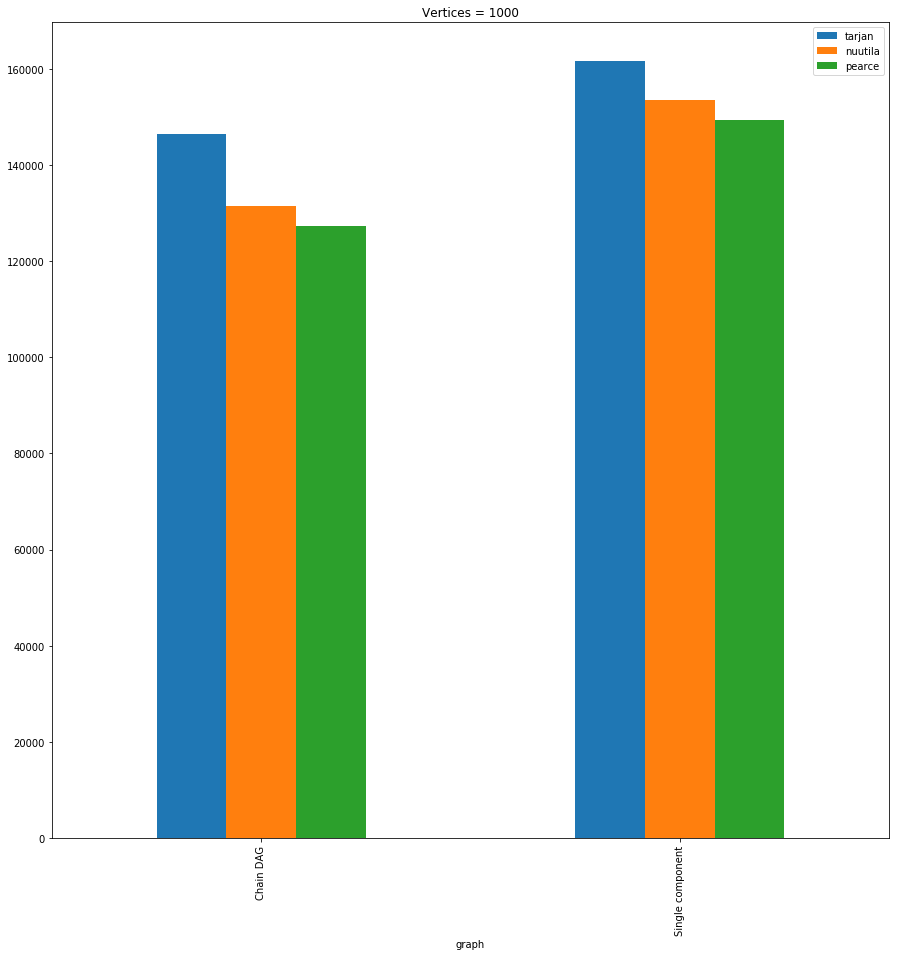

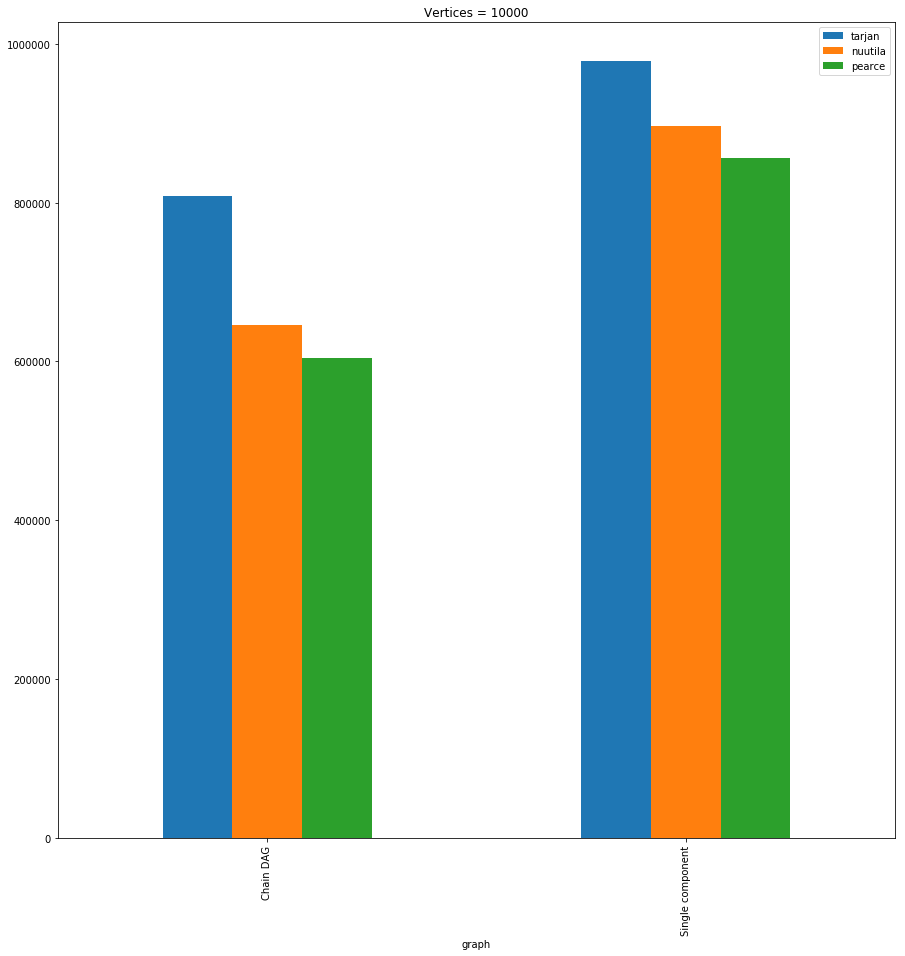

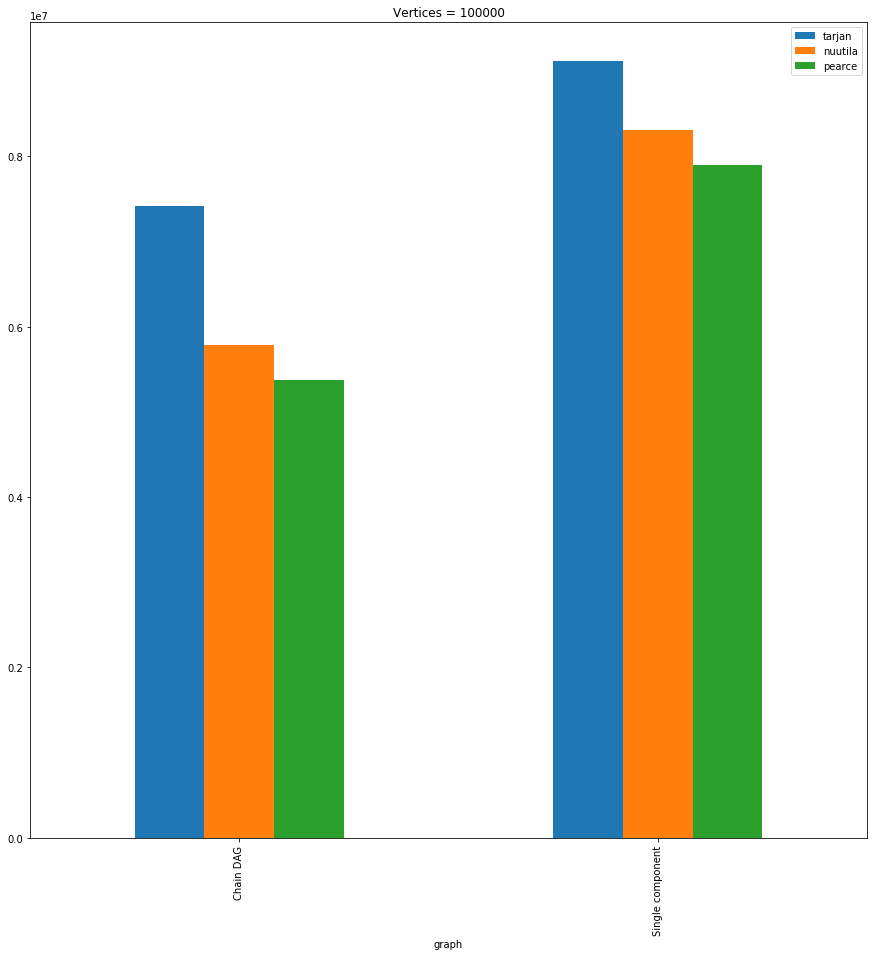

In [24]:
for v in sorted(list(set(res2.v.values.tolist()))):
    res2[res2.v==v].plot(x="graph", y=["tarjan", "nuutila", "pearce"], figsize=[15,15], kind="bar", title = f'Vertices = {v}')